In [1]:
"""Notebook for inspecting GQN dataset"""

'Notebook for inspecting GQN dataset'

In [2]:
import os
import sys
import unittest
from pathlib import Path
import tensorflow as tf

# tensorflow settings
tf.enable_eager_execution()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # suppress warnings

In [3]:
# constants
BASE_DIR = '.'    # path to project root directory
TEST_DIR = os.path.join(BASE_DIR, 'data/')
TEST_FILENAME = os.path.join(TEST_DIR, 'rooms_ring_camera/train/', '0001-of-2160.tfrecord')    # file used for testing

sys.path.append(BASE_DIR)    # append project root to import paths

In [4]:
# import utilities for data conversion
from utils.tfrecord_converter import *
from utils.tfrecord_converter import _DATASETS

# import tool for visualization
from utils.visualizer import Visualizer

In [5]:
# load example data
info = _DATASETS['rooms_ring_camera']

raw_data = tf.python_io.tf_record_iterator(TEST_FILENAME).__next__()

frames, cameras = convert_raw_to_numpy(info, raw_data, None)

print(frames.shape)
print(cameras.shape)

TypeError: cannot unpack non-iterable NoneType object

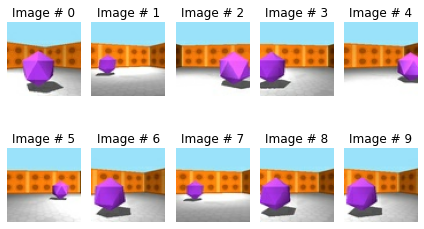

In [7]:
vis = Visualizer()

# visualize one of the frame data
vis.show_img_grid(frames, 2, 5)


(10, 64, 64, 3)


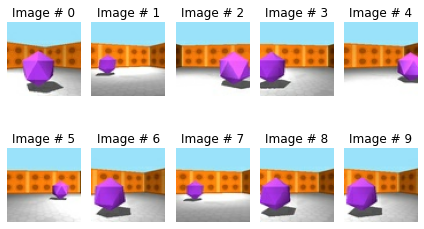

(10, 5)
(10, 64, 64, 3)


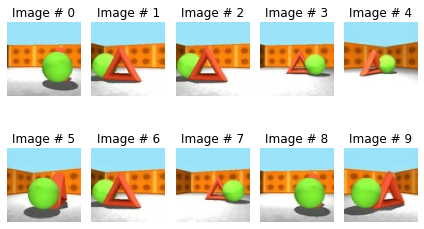

(10, 5)
(10, 64, 64, 3)


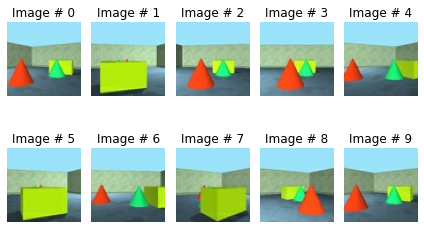

(10, 5)
(10, 64, 64, 3)


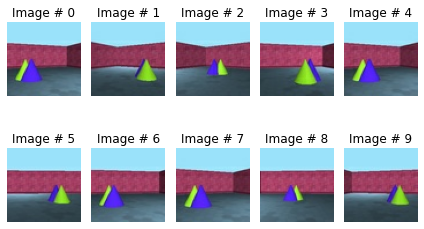

(10, 5)
(10, 64, 64, 3)


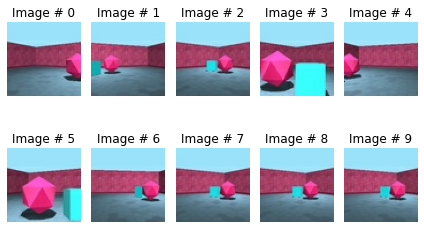

(10, 5)
(10, 64, 64, 3)


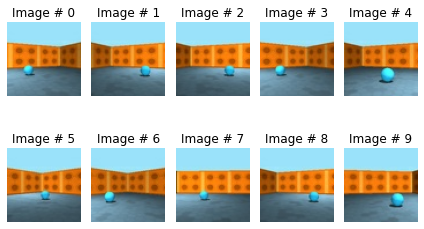

(10, 5)
(10, 64, 64, 3)


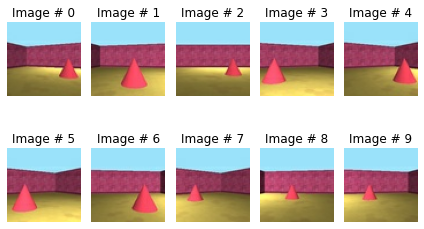

(10, 5)
(10, 64, 64, 3)


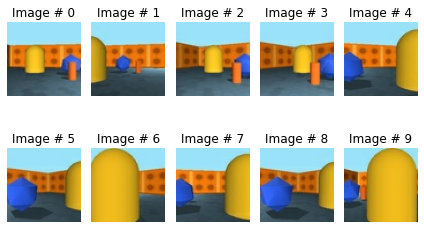

(10, 5)
(10, 64, 64, 3)


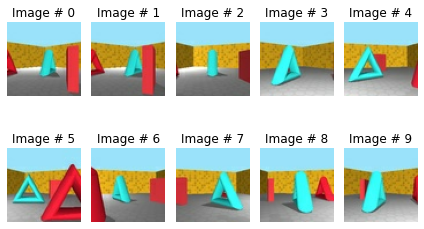

(10, 5)
(10, 64, 64, 3)


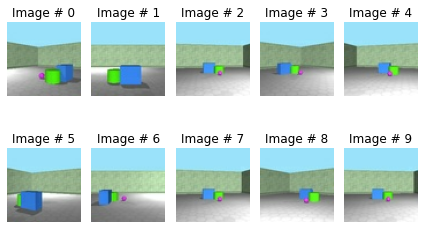

(10, 5)


In [8]:
from os import listdir
import torch
import pickle

TEST_PATH = os.path.join(TEST_DIR, 'rooms_ring_camera_torch/train/')

from utils.tfrecord_converter import Context

cnt = 0
for file in sorted(listdir(TEST_PATH)):
    path = os.path.join(TEST_PATH, file)
    with open(path, 'rb') as f:
        context = pickle.load(f)
        frames = context[0]
        cameras = context[1]
        print(frames.shape)
        vis.show_img_grid(frames, 2, 5)
        print(cameras.shape)
    cnt += 1

    if (cnt == 10):
        break